<a href="https://colab.research.google.com/github/marsred/The_School_Of_AI/blob/master/Session3/assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 4s 0us/step


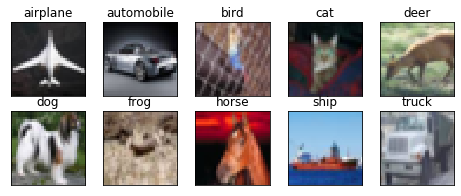

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same'))
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3))`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(96, (3, 3))`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(192, (3, 3), padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Conv2D` 

In [0]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_134 (Activation)  (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_135 (Activation)  (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_167 (Dropout)        (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 15, 15, 96)      

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  if sys.path[0] == '':


Epoch 1/50
390/390 [==============================] - 31s 79ms/step - loss: 1.8512 - acc: 0.2872 - val_loss: 1.4258 - val_acc: 0.4711
Epoch 2/50
390/390 [==============================] - 22s 56ms/step - loss: 1.3526 - acc: 0.5075 - val_loss: 1.1547 - val_acc: 0.5795
Epoch 3/50
390/390 [==============================] - 22s 56ms/step - loss: 1.1237 - acc: 0.6001 - val_loss: 0.9505 - val_acc: 0.6686
Epoch 4/50
390/390 [==============================] - 22s 56ms/step - loss: 0.9711 - acc: 0.6612 - val_loss: 0.8581 - val_acc: 0.7056
Epoch 5/50
390/390 [==============================] - 22s 55ms/step - loss: 0.8646 - acc: 0.7047 - val_loss: 0.7816 - val_acc: 0.7287
Epoch 6/50
390/390 [==============================] - 22s 56ms/step - loss: 0.7900 - acc: 0.7293 - val_loss: 0.7134 - val_acc: 0.7536
Epoch 7/50
390/390 [==============================] - 22s 55ms/step - loss: 0.7362 - acc: 0.7477 - val_loss: 0.6850 - val_acc: 0.7674
Epoch 8/50
390/390 [==============================] - 22s 56ms

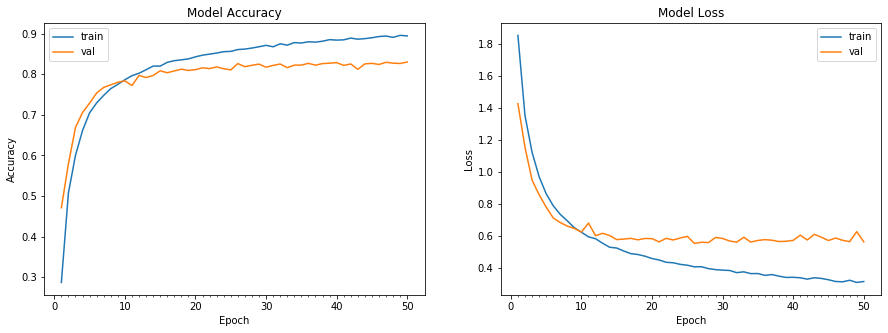

Accuracy on test data is: 82.99


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
# Define the model
model = Sequential()
model.add(SeparableConv2D(48, 3, padding='same', input_shape=(32, 32, 3))) # 32, RF: 3
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, 3)) # 30, RF: 5
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(192, 3)) # 28, RF: 7
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 14, RF: 9
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, 3, padding='same')) # 14, RF: 17
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, 3)) # 12, RF: 25
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(SeparableConv2D(96, 3)) # 10, RF: 33
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(MaxPooling2D(pool_size=(2, 2))) # 5, RF: 41
model.add(Dropout(0.1))

model.add(GlobalAveragePooling2D())
#model.add(Flatten())

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(num_classes, activation='softmax'))

# learning rate
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.004 * 1/(1 + 0.2 * epoch), 10)

# Compile the model
model.compile(optimizer=Adam(lr=0.004), loss='categorical_crossentropy', metrics=['accuracy'])
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_19 (Separab (None, 32, 32, 48)        219       
_________________________________________________________________
activation_22 (Activation)   (None, 32, 32, 48)        0         
_________________________________________________________________
batch_normalization_19 (Batc (None, 32, 32, 48)        192       
_________________________________________________________________
dropout_28 (Dropout)         (None, 32, 32, 48)        0         
_________________________________________________________________
separable_conv2d_20 (Separab (None, 30, 30, 96)        5136      
_________________________________________________________________
activation_23 (Activation)   (None, 30, 30, 96)        0         
_________________________________________________________________
batch_normalization_20 (Batc (None, 30, 30, 96)       

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, callbacks=[<keras.ca..., steps_per_epoch=390, epochs=50)`
  del sys.path[0]


Epoch 1/50

Epoch 00001: LearningRateScheduler setting learning rate to 0.004.
390/390 [==============================] - 31s 79ms/step - loss: 1.4738 - acc: 0.4647 - val_loss: 1.7124 - val_acc: 0.4816
Epoch 2/50

Epoch 00002: LearningRateScheduler setting learning rate to 0.0033333333.
390/390 [==============================] - 28s 71ms/step - loss: 1.1116 - acc: 0.6066 - val_loss: 1.1940 - val_acc: 0.6154
Epoch 3/50

Epoch 00003: LearningRateScheduler setting learning rate to 0.0028571429.
390/390 [==============================] - 28s 71ms/step - loss: 0.9662 - acc: 0.6589 - val_loss: 1.0737 - val_acc: 0.6488
Epoch 4/50

Epoch 00004: LearningRateScheduler setting learning rate to 0.0025.
390/390 [==============================] - 28s 71ms/step - loss: 0.8824 - acc: 0.6900 - val_loss: 0.9888 - val_acc: 0.6865
Epoch 5/50

Epoch 00005: LearningRateScheduler setting learning rate to 0.0022222222.
390/390 [==============================] - 28s 71ms/step - loss: 0.8262 - acc: 0.7119 - val

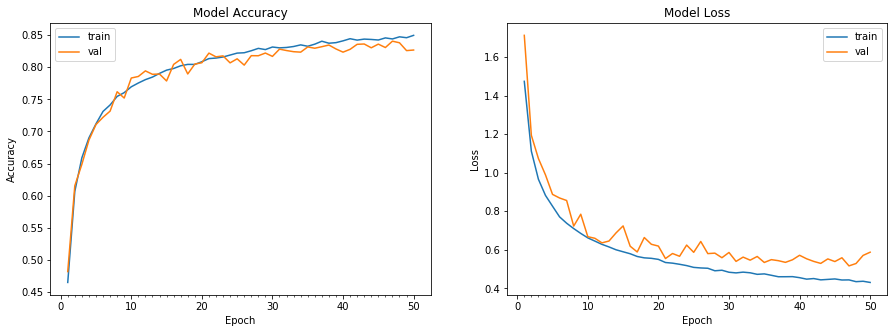

Accuracy on test data is: 82.69


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=True, rotation_range=30)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1,
                                 callbacks=[LearningRateScheduler(scheduler, verbose=1)])
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))